# !Note!
Do not run this code! Here lays only the code of project; the logs, images files are not archived, because it is too heavy. If you want to run and check the results or use log files for graph plotting, instead check out the whole project with all files. You can find it in my github repository, with possible new additions.<br> 
Name of project in github: "Studing CNN with Musical instuments image-dataset".<br>
Here is the link: https://github.com/MillaPy/Studing-CNN-with-Musical-instuments-image-dataset. <br>

## Task-plan for whole project
We have big dataset. Three big folders with different musical instruments. So, I decided to break the project tasks into several notebooks with done job. The first part about exploration the dataset and analysing the random images, on the other hand, second part is about working with custom model, likewise, the third one is working with keras pre-trained model. Then the last part is to give summary, in the end of whole project.<br>
Task list:<br>
1. Part 1. Dataset: <- we are here right now
   1. Open dataset<br>
   2. Clean dataset<br>
   3. Analyze & explore dataset<br>
2. Part 2. Custom model: <br>
   1. Break into subsets: 70/30 and 80/20<br>
   2. Data pre-processing & Reqularization: data augmentation<br>
   3. Model fitting<br>
   4. Plot graph result<br>
   5. Plot confusion matrix<br>
   6. Evaluate precision, recall, accuracy, f1-score<br>
3. Part 3. Keras model<br>
   1. Break into subsets: 70/30 and 80/20<br>
   2. Data pre-processing & Reqularization: data augmentation<br>
   3. Model fitting<br>
   4. Plot graph result<br>
   5. Plot confusion matrix<br>
   6. Evaluate precision, recall, accuracy, f1-score<br>
4. Part 4. Summary<br>

### Part 1. Dataset exploration 
#### Open & clean dataset

In [1]:
#import needed libs for this work
import numpy as np 
import os
import imageio
import PIL.Image 
import pathlib
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
import matplotlib.image as mpimg 
import matplotlib as mpl
from scipy import ndimage
import cv2 as cv
import scipy.misc
import skimage.filters
import sklearn.metrics
import plotly.express as px
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
%matplotlib inline

In [27]:
#get path to images
accordeon_dir = os.path.join('final/accordeon')
dombyra_dir = os.path.join('final/dombyra')
kobyz_dir = os.path.join('final/kobyz')

#read quantaty of images in each folder
print('total training accordeon images:', len(os.listdir(accordeon_dir)))
print('total training dombyra images:', len(os.listdir(dombyra_dir)))
print('total training kobys images:', len(os.listdir(kobyz_dir)))

total training accordeon images: 367
total training dombyra images: 390
total training kobys images: 309


In [4]:
#get path to images again as folders
datadir = "C:\\Users\\camil\\Desktop\\my own study\\studying the cnn\\final"
dombyra_folder = datadir+'\\dombyra\\'
kobyz_folder = datadir+'\\kobyz\\'
accordeon_folder = datadir+'\\accordeon\\'

In [78]:
#rename content of dombyra folder
for i, f in enumerate(os.listdir(dombyra_folder)):
    oldname = os.path.join(dombyra_folder, f)
    if i in range(1, 10):
        os.rename(oldname, "dombyra000" + str(i) + ".jpg")
    if i in range(10, 100):
        os.rename(oldname, "dombyra00" + str(i) + ".jpg")
    if i in range(100, 1000):
        os.rename(oldname, "dombyra0" + str(i) + ".jpg")

In [79]:
#rename content of kobyz folder
for i, f in enumerate(os.listdir(kobyz_folder)):
    oldname = os.path.join(kobyz_folder, f)
    if i in range(1, 10):
        os.rename(oldname, "kobyz000" + str(i) + ".jpg")
    if i in range(10, 100):
        os.rename(oldname, "kobyz00" + str(i) + ".jpg")
    if i in range(100, 1000):
        os.rename(oldname, "kobyz0" + str(i) + ".jpg")

In [80]:
#rename content of accordion folder
for i, f in enumerate(os.listdir(accordeon_folder)):
    oldname = os.path.join(accordeon_folder, f)
    if i in range(0, 10):
        os.rename(oldname, "accordion000" + str(i) + ".jpg")
    if i in range(10, 100):
        os.rename(oldname, "accordion00" + str(i) + ".jpg")
    if i in range(100, 1000):
        os.rename(oldname, "accordion0" + str(i) + ".jpg")

Commentary note:<br>
I wrote a snipet of code where I clean dataset thoroughly, yet the results were disappointing, so, I manually cleaned
the folders and deleted the code, because it was useless.

#### Explore our dataset, see with what we are working
##### Denoising documents

In [3]:
###analyze dataset

In [12]:
#lest read some random images from each folder
dombyra_img = imageio.imread(dombyra_folder + '/dombyra0286.jpg')
kobyz_img = imageio.imread(kobyz_folder+'/kobyz0068.jpg')
accordion_img = imageio.imread(accordeon_folder+'/accordion0352.jpg')

In [6]:
#and perform some median filtering
def median_filter(img):
    median_img = cv.medianBlur(img, 1)#image blurring
    #why median blur:the central element of the image is replaced by the median of all the pixels in the kernel area
    #This operation processes the edges while removing the noise
    d_img = ndimage.distance_transform_bf(img)#now we need to transform image
    img_noise = d_img + (0.2*(np.random.randn(*d_img.shape)))#so we could find the un-ry noise
    img_med = ndimage.median_filter(img_noise*255, 3)#and perform median filtering based on noise and distance
    plt.figure(figsize=(16, 5))
    plt.subplot(141)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.title('Original image', fontsize=20)
    plt.subplot(142)
    plt.imshow((img_noise*255).astype(np.uint8), interpolation='nearest', vmin=0, vmax=5)
    plt.axis('off')
    plt.title('Noisy image', fontsize=20)
    plt.subplot(143)
    plt.imshow((img_med).astype(np.uint8), interpolation='nearest', vmin=0, vmax=5)
    plt.axis('off')
    plt.title('Median filter with scipy', fontsize=20)
    plt.subplot(144)
    plt.imshow(median_img, interpolation='nearest', vmin=0, vmax=5)
    plt.axis('off')
    plt.title('Median blur with opencv', fontsize=20)
    
    plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
    plt.show()

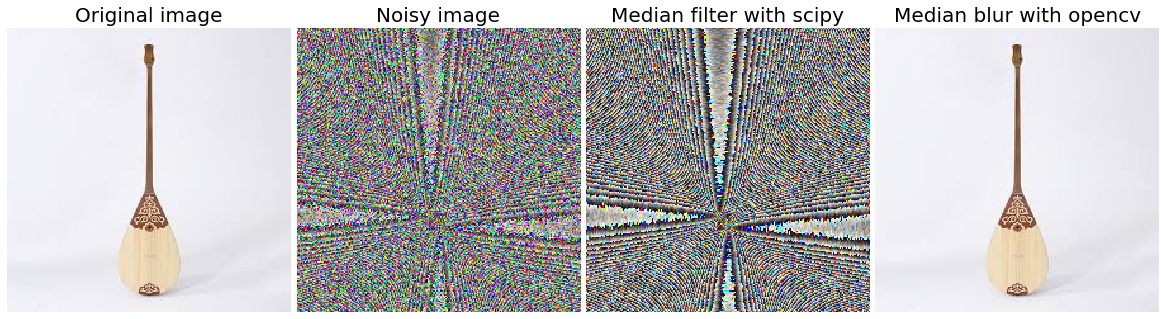

In [7]:
median_filter(dombyra_img)#now lets see the results of median blur and filtering
#Why use median filtering?
#to remove noise from an image, so such noise reduction is a typical pre-processing step to improve the results 
#of later processing (edge detection on an image)

In [8]:
#this snipet of code were borrowed from previous lab works, to plot histogram of image
def histogram(image, **kwargs):
    x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
    dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
    bins = 256 if 'bins' not in kwargs else kwargs['bins']
    rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
    interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

    fig = plt.figure(figsize=(x/dpi, y/dpi))

    gs1 = gridspec.GridSpec(1, 3)
    gs1.update(	left=0,
                right=1,
                bottom=0,
                top=1,
                wspace=0,
                hspace=0)
    ax1 = plt.subplot(gs1[:, 0])
    ax1.axis('off')
    ax2 = plt.subplot(gs1[:, 1:])

    img = image.copy()

    if img.ndim == 2:
        ax1.imshow(	img,
                    cmap='gray',
                    vmin=interval[0],
                    vmax=interval[1])
        ax2.hist(img.ravel(),
                bins=bins,
                range=interval,
                rwidth=rw,
                color='k')
    elif img.ndim == 3:
        imgo = (img - interval[0])/(interval[1] - interval[0])
        imgo[imgo < 0] = 0
        imgo[imgo > 1] = 1

        R = img[:,:,0]
        G = img[:,:,1]
        B = img[:,:,2]

        ax1.imshow(imgo)
        ax2.hist(R.ravel(),
                bins=bins,
                range=interval,
                rwidth=rw,
                fc=(1, 0, 0.25, 0.5))
        ax2.hist(G.ravel(),
                bins=bins,
                range=interval,
                rwidth=rw,
                fc=(0.25, 1, 0, 0.5))
        ax2.hist(B.ravel(),
                bins=bins,
                range=interval,
                rwidth=rw,
                fc=(0, 0.25, 1, 0.5))
    else:
        raise ValueError('Invalid argument! It is not an image..')
    plt.show()#i did not write my own code, because it simply more work
    #i just simplify my task and borrowed from previous lab-works, to not take time

In [9]:
#i want to perform some sobel filtering, i need convolutional noise smoothing, with low  pass filter
#also the code were lend from previous lab works
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    # Kernel radius
    rh, rw = np.array(h.shape)//2
    # Init output
    output = np.zeros(x.shape)
    for n1 in range(rh, xh-rh):
        for n2 in range(rw, xw-rw):
            value = 0
            for k1 in range(hh):
                for k2 in range(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

In [10]:
#soble filtering
def sobel_filter(img):
    #convolution with opencv2
    sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
    #visualisation
    plt.figure(figsize=(16,5))
    plt.subplot(1,3,1),plt.imshow((img).astype(np.uint8),cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow((sobelx).astype(np.uint8),cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow((sobely).astype(np.uint8),cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.show()
    #finding gradient of 2 derivative approximations to find gradient magnitude
    G = (sobelx**2 + sobely**2)**0.5
    histogram(G, interval=[0, 255])

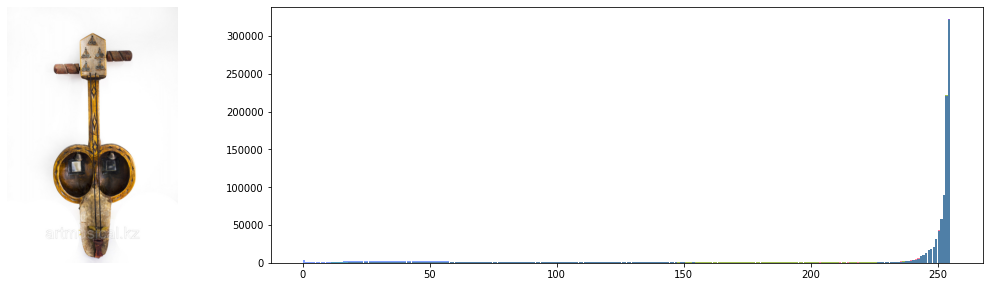

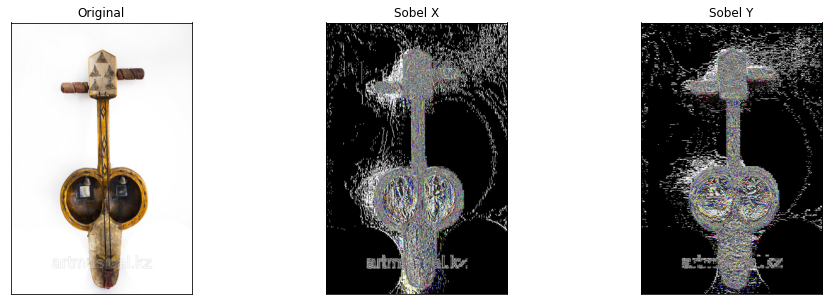

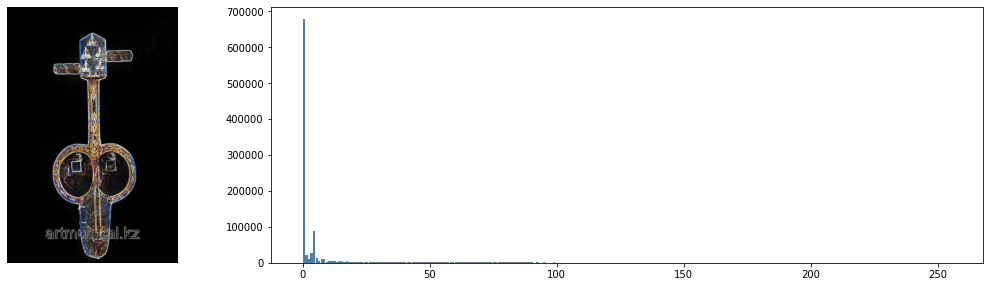

In [30]:
#so, now after knowing importance of median filter, lets apply it single-handenly
median_filtered = scipy.ndimage.median_filter((kobyz_img).astype(np.uint8), size=1)
histogram(kobyz_img, interval=[0, 255])#and now see original image information
sobel_filter(median_filtered)#using sobel operator, and see the modification

In [32]:
def edge_detection(img, r):#sobel filtering, gradient estimation
    #5x5 filter
    ht = np.array([[9, 9, -7, -7, -7]])
    # Central difference
    hc = np.array([[r, r, r, r, r]])
    # Sobel operator
    Hx = ht.T*hc
    Hy = hc.T*ht
    #grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #padding zero
    img_pad = np.pad((gray).astype(np.uint8),((r, r), (r, r)),'edge')
    #convolution
    Gx = convolve(img_pad, Hx)[r:-r, r:-r]
    histogram(Gx,interval=[Gx.min(), Gx.max()])
    Gy = convolve(img_pad, Hy)[r:-r, r:-r]
    histogram(Gy, interval=[Gy.min(), Gy.max()])
    #find gradient's direction
    Theta = np.arctan2(Gy, Gx)
    histogram(Theta, interval=[Theta.min(), Theta.max()])
#why need edge detection:
#we find the boundaries or edges of objects in an image, by determining where the brightness of the image changes dramatically
#it can be used to extract the structure of objects in an image

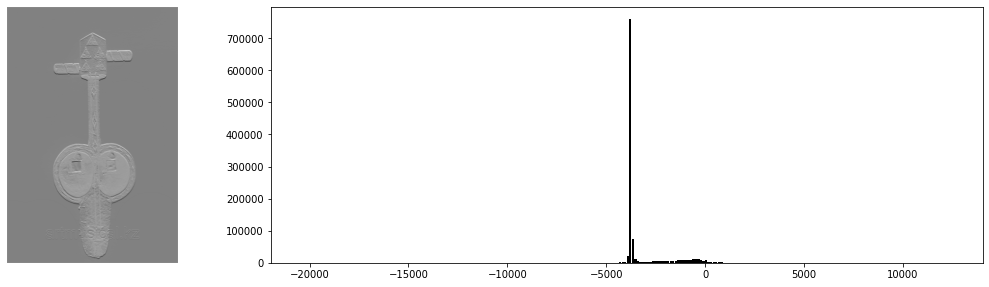

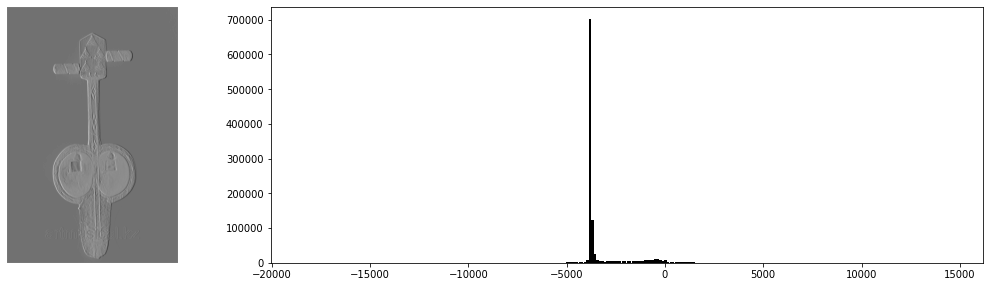

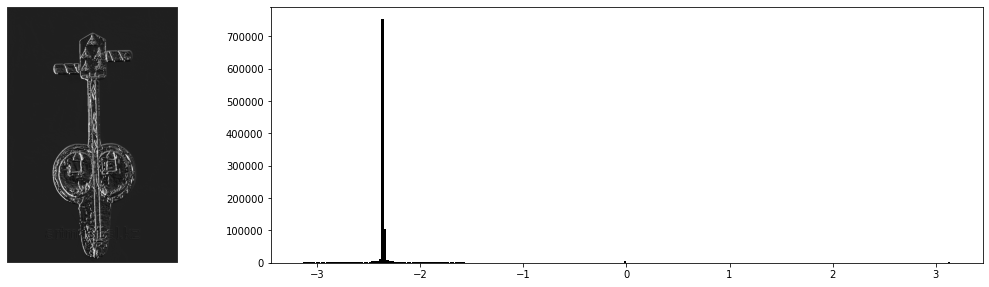

In [33]:
edge_detection(median_filtered, 1)#now do some filtering, using median_filtered image
#why sobel: advantage of Sobel operator is its simplicity which is because of the approximate gradient calculation

In [11]:
def summary(image):#also were lend from another of lab-works
    #to generally give idea about image
    if image.ndim == 2:
        SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
        SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
    elif image.ndim == 3:
        R = image[:,:,0]
        G = image[:,:,1]
        B = image[:,:,2]
        SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
        SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
    else:
        raise ValueError('Invalid argument! It is not an image..')
    print(SUM)

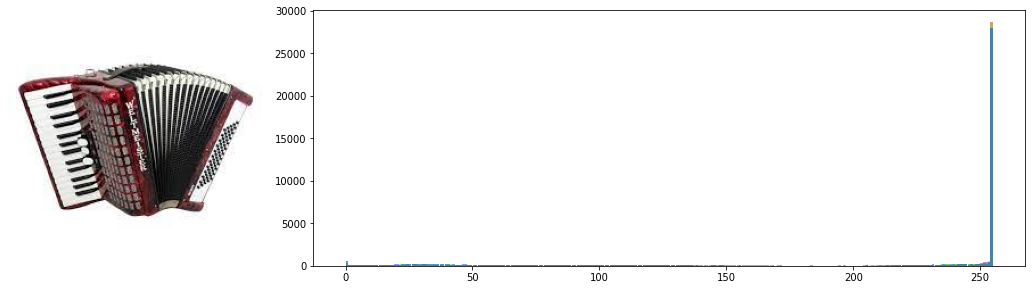

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:        130.0000        108.0000        106.0000
    median:        255.0000        255.0000        255.0000
      mean:        198.3719        192.9855        192.5156
  3rd Quar:        255.0000        255.0000        255.0000
       max:        255.0000        255.0000        255.0000
     sigma:         85.0111         91.7604         91.6177


In [12]:
#now lets find some values of accordion: plot histogram and find RGB values
histogram(accordion_img, bins=255)
summary(accordion_img)

In [13]:
#equlisation with RGB values, why use Histogram Eq.:
#to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram
#The objective of this technique is to give a linear trend to the cumulative probability function associated to the image
def eqHist2(matrix_in):
    # Read input grayscale image
    matrix_in = matrix_in.copy()
    N1, N2, N3 = matrix_in.shape
    # Flat image to be sorted
    flat = matrix_in.ravel()
    # Sort the pixels
    sort = np.sort(flat)
    # Find the sorted index for each gray value
    search = sort.searchsorted(matrix_in)
    # Normalize the output
    norm = search/(N1*N2*N3 - 1)
    return norm

                          R               G               B
       min:          0.0000          0.0000          0.0000
  1st Quar:          0.5098          0.4235          0.4157
    median:          1.0000          1.0000          1.0000
      mean:          0.7779          0.7568          0.7550
  3rd Quar:          1.0000          1.0000          1.0000
       max:          1.0000          1.0000          1.0000
     sigma:          0.3334          0.3598          0.3593


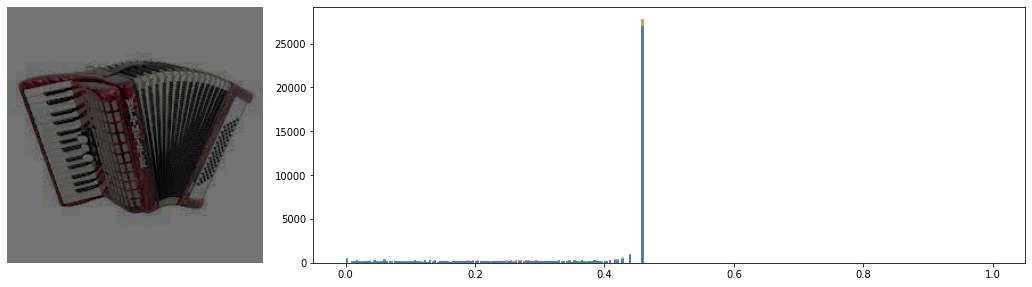

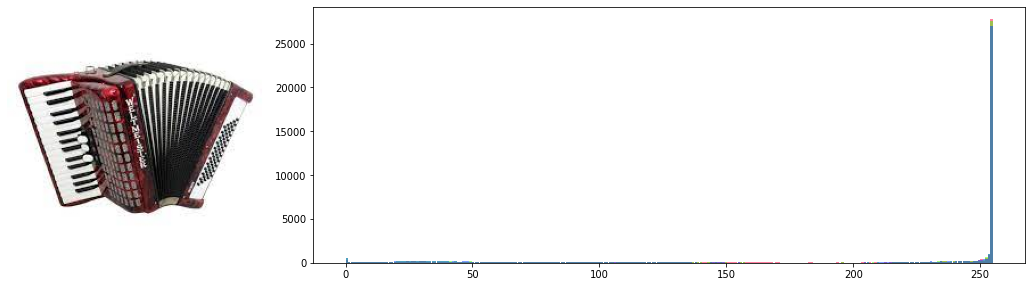

In [14]:
#equalization visualisation with summary
def vis_eqhist2(img):
    (B, G, R) = cv.split(img)
    img_float = img/(2**8 - 1)
    summary(img_float)
    img_float_eq = eqHist2(img_float)
    histogram(img_float_eq, bins=2**8, interval=[0, 1])
    histogram(img,bin=2**8)
#call the function
vis_eqhist2(accordion_img)

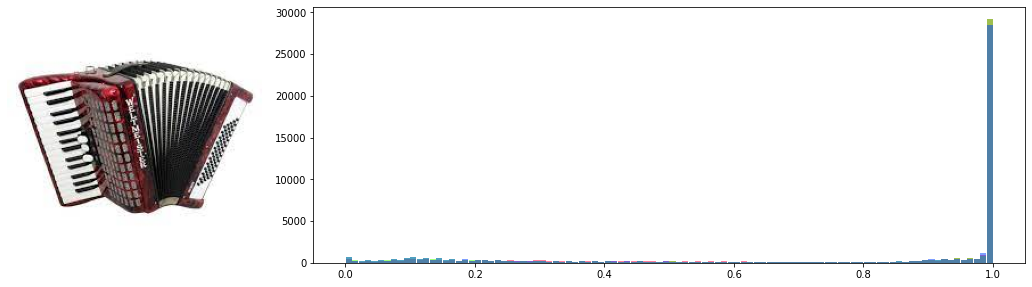

In [34]:
#also normalize the image
normal_image = cv.normalize(accordion_img, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
histogram(normal_image, bins=100,interval=[0, 1])

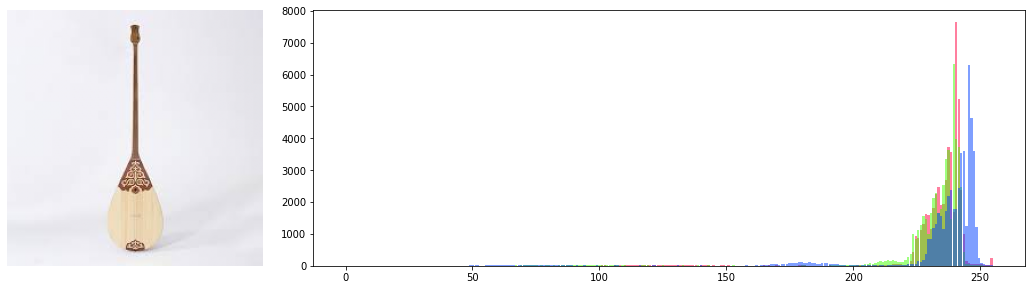

In [35]:
#image segmentation: thresholding yen
#see the central figure
histogram(dombyra_img, bins=2**8,opacity=0.5)
#why use thresholding?
#Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze

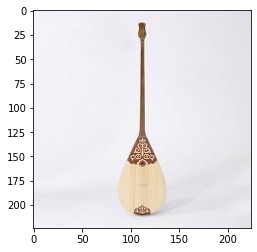

Text(0, 0.5, 'Count')

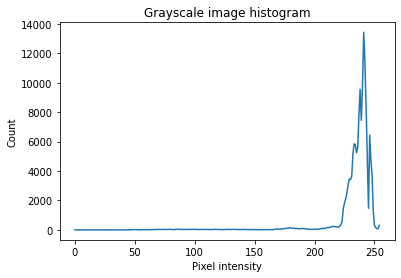

In [23]:
#reading grayscale image before thresholding
grayscale = PIL.Image.open(dombyra_folder+'/dombyra0286.jpg')
plt.imshow(grayscale, cmap='gray')
plt.show()
#Visualize histogram of the pixel intensities of grayscale
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')

Text(0.5, 1.0, 'median filtered image')

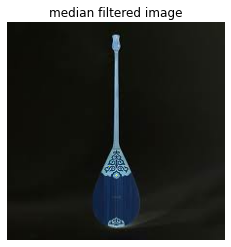

In [21]:
#apply specifically median filtering beforehand and visualising the img
median_filtered = scipy.ndimage.median_filter((dombyra_img*255).astype(np.uint8), size=1)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median filtered image')

In [24]:
#split to binary, and compare predicted & binary images as well
image = grayscale
threshold = skimage.filters.threshold_yen(median_filtered)
threshold_yen = skimage.filters.threshold_yen(dombyra_img)
binary_yen = image > threshold_yen
predicted_yen = np.uint8(median_filtered > threshold) * 255

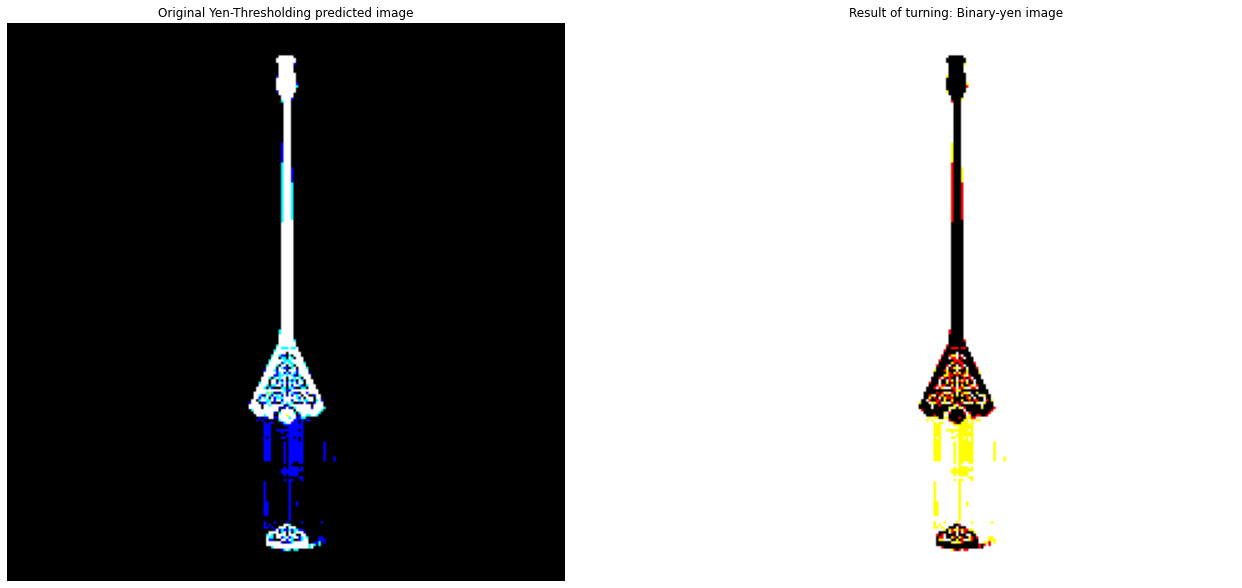

In [25]:
#show final results of thresholding
fig, axes = plt.subplots(ncols=2, nrows = 1, figsize=(22, 12))
ax = axes.ravel()

ax[0].imshow(predicted_yen.astype(np.uint8), cmap=plt.cm.gray)
ax[0].set_title('Original Yen-Thresholding predicted image')

ax[1].imshow((binary_yen*255).astype(np.uint8), cmap=plt.cm.gray)
ax[1].set_title('Result of turning: Binary-yen image')
for a in ax:
    a.axis('off')

plt.show()

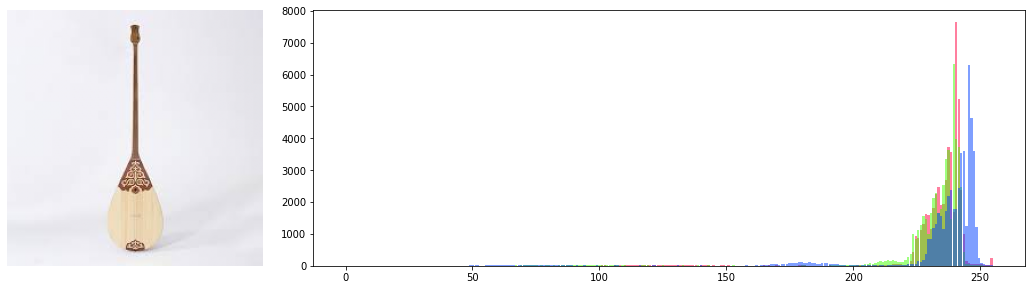

Accuracy of Threshold Yen:  97.36 %


In [26]:
#here is the accuracy and visual representation of image 
histogram(dombyra, interval=[0, 255])
groundtruth_scaled = dombyra // 255 #groundtruth
groundtruth_list = (groundtruth_scaled).flatten().tolist()
predicted_scaled_yen = predicted_yen // 255
predicted_list_yen = (predicted_scaled_yen).flatten().tolist()
print("Accuracy of Threshold Yen: ", np.round(accuracy_score(groundtruth_list, predicted_list_yen)*100, 3), "%")
#why adaptive thresholding?
#adaptive thresholding is used to separate desirable foreground image objects 
#from the background based on the difference in pixel intensities of each region

In [27]:
#show some images->explore what we have

In [30]:
#i decided to create some dataset from image folders we have, and read some images
data_dir = pathlib.Path(datadir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

332


In [31]:
#creation of dataset with keras function
some_img_val = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123,
  image_size=(180, 180), batch_size=32)

Found 332 files belonging to 3 classes.
Using 266 files for training.


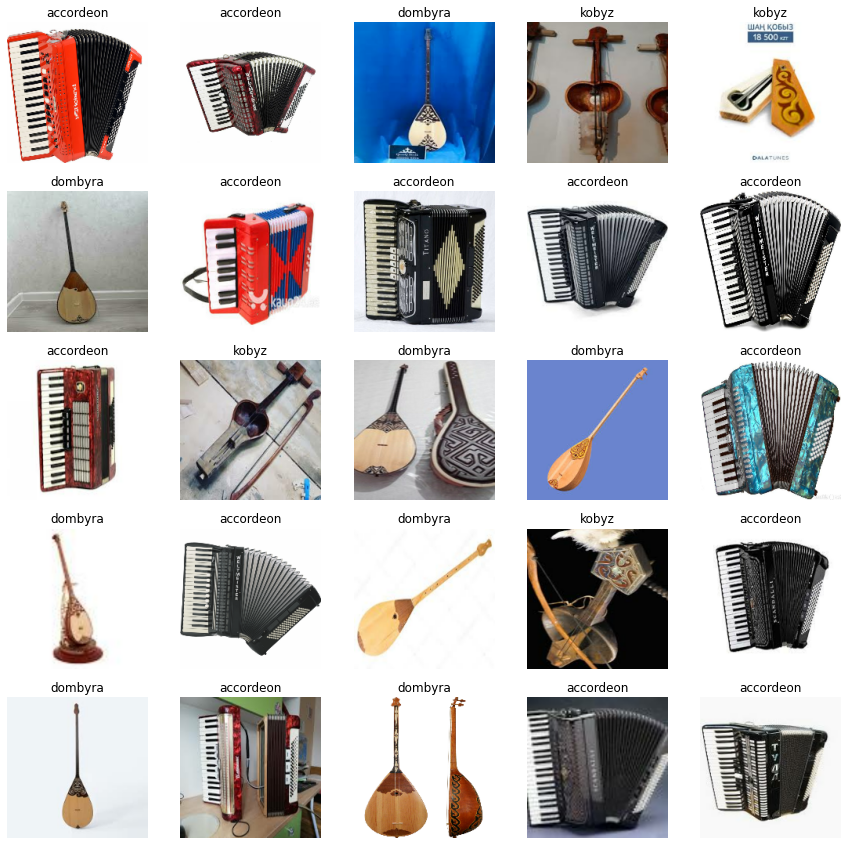

In [34]:
#give labels to images
class_names = some_img_val.class_names#['Dombyra', 'Kobyz', 'Accordion']
#read images
plt.figure(figsize=(15, 15))
for images, labels in some_img_val.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Sum up part 1

In this part, I just opened and manually cleaned the dataset, hence it took too long to do by code and the process of cleaning has gone poorly, so, as it says, I took matter on my hand, literally. Then I decided to do denoising of random images of dataset. So, I add median filtering, median blur, Sobel filtering, histogram equalisation, edge detection and adaptive thresholding processes, reasons were given above as commentary. All similar job has been done on laboratory works before, some functions were lend from previous lab-works, most of the code above I used and wrote to do my lab-works. This part to understand with what we are working and how it will affect on model fitting and predictions furthermore, and, of course, just to play around with images and review our knowledge with working images.<br> 
There are several surface cleaning methods used for both preserving and cleaning, but they have certain limits, the major one being: that the original document might get altered during the process. So, we clean it, and I used Denoising processes. Denoising documents enables the creation of higher fidelity digital recreations of original documents.<br>
Well, okay, now, lets go to the second part.  